#create a list of nodes connected to current node

In [1]:
import numpy as np
import pandas as pd
import random

# setting the seed for random number generation
np.random.seed(0)

#small network: 50, medium network : 200, large network: 500
number_of_nodes = 500
# Decide a nodal degree for each node, minimum degree = 3, maximum degree = 10
nodal_degrees = 3 + np.random.randint(low = 0, high = 8, size = number_of_nodes)
total_link_count = sum(nodal_degrees)
list_of_all_links = []
for j in range(0, number_of_nodes):
    list_of_all_links.append(random.sample(range(number_of_nodes), nodal_degrees[j]))


In [2]:
nodal_degrees

array([ 7, 10,  8,  3,  6,  6,  6, 10,  4,  6,  8,  5,  7, 10,  9,  3,  3,
        7,  5,  4,  9, 10, 10,  9,  3,  4,  8,  4,  8,  3,  4,  7,  6,  3,
        6,  8,  9, 10, 10,  3,  5,  6,  3,  4,  6,  8,  6,  6,  9, 10,  3,
        4,  4,  4, 10,  3, 10,  5,  7, 10,  6,  9,  6,  5, 10,  7,  5,  3,
        3,  7,  8,  8,  9,  3,  7,  4, 10,  7,  4,  5,  5, 10,  3,  4,  4,
       10,  4,  4,  6,  9, 10,  6,  9,  5,  6,  3,  9,  6,  8,  7,  4,  5,
        7,  6,  7,  9,  7, 10, 10,  7,  6,  7,  7,  7,  3,  9, 10,  7,  6,
        5, 10, 10,  8,  8,  8,  3,  4,  8,  4,  6,  3, 10,  8,  9,  3,  4,
        5,  7,  5,  3,  8,  6,  5,  5,  8,  3, 10,  8,  4, 10,  3,  5,  5,
        6,  5, 10, 10,  6,  5,  4,  5,  9,  6,  9,  6,  6,  5,  9,  6,  7,
        4,  5,  6,  9,  4,  5,  4,  7,  5,  9,  6,  3,  6,  5,  6,  3,  3,
        9,  3,  9,  6,  9,  5,  6,  3,  7,  3,  8,  9,  3,  8,  5,  6,  9,
        5,  6,  8,  3,  3,  3,  6, 10,  3,  5,  5,  3,  7,  6,  7,  8,  9,
        3,  7,  6,  8,  6

In [3]:
list_of_all_links

[[142, 215, 310, 271, 171, 474, 197],
 [283, 192, 92, 314, 31, 391, 194, 178, 361, 64],
 [306, 305, 229, 385, 437, 101, 73, 232],
 [497, 408, 416],
 [465, 494, 320, 56, 462, 147],
 [257, 367, 39, 167, 99, 375],
 [488, 309, 241, 149, 177, 21],
 [338, 314, 66, 391, 240, 367, 483, 484, 417, 93],
 [48, 272, 328, 114],
 [217, 476, 423, 355, 93, 31],
 [89, 317, 164, 210, 318, 140, 300, 160],
 [358, 204, 79, 55, 428],
 [394, 274, 475, 93, 358, 202, 60],
 [409, 227, 464, 58, 132, 156, 191, 485, 74, 168],
 [180, 349, 124, 403, 479, 141, 243, 13, 457],
 [263, 236, 379],
 [353, 404, 246],
 [246, 458, 48, 347, 335, 93, 455],
 [384, 112, 281, 493, 85],
 [230, 225, 442, 323],
 [343, 229, 333, 272, 410, 180, 477, 208, 65],
 [332, 254, 160, 315, 239, 383, 190, 360, 267, 232],
 [236, 244, 389, 367, 13, 188, 195, 453, 80, 231],
 [208, 153, 15, 119, 159, 430, 431, 300, 152],
 [92, 49, 224],
 [93, 175, 256, 292],
 [467, 52, 142, 301, 258, 96, 476, 317],
 [351, 142, 77, 236],
 [281, 486, 23, 98, 28, 128, 7

In [4]:
total_link_count

3188

In [5]:
# Creates a list containing 5 lists, each of 8 items, all set to 0
w, h = number_of_nodes, number_of_nodes
adjacency_matrix = [[0 for x in range(w)] for y in range(h)] 

i = 0
for l in list_of_all_links:
    for num in l:
        adjacency_matrix[i][num] = 1
    i = i + 1

adjacency_matrix = np.array(adjacency_matrix)
adjacency_matrix


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
np.where(adjacency_matrix == 1)

(array([  0,   0,   0, ..., 499, 499, 499]),
 array([142, 171, 197, ...,  78,  93, 130]))

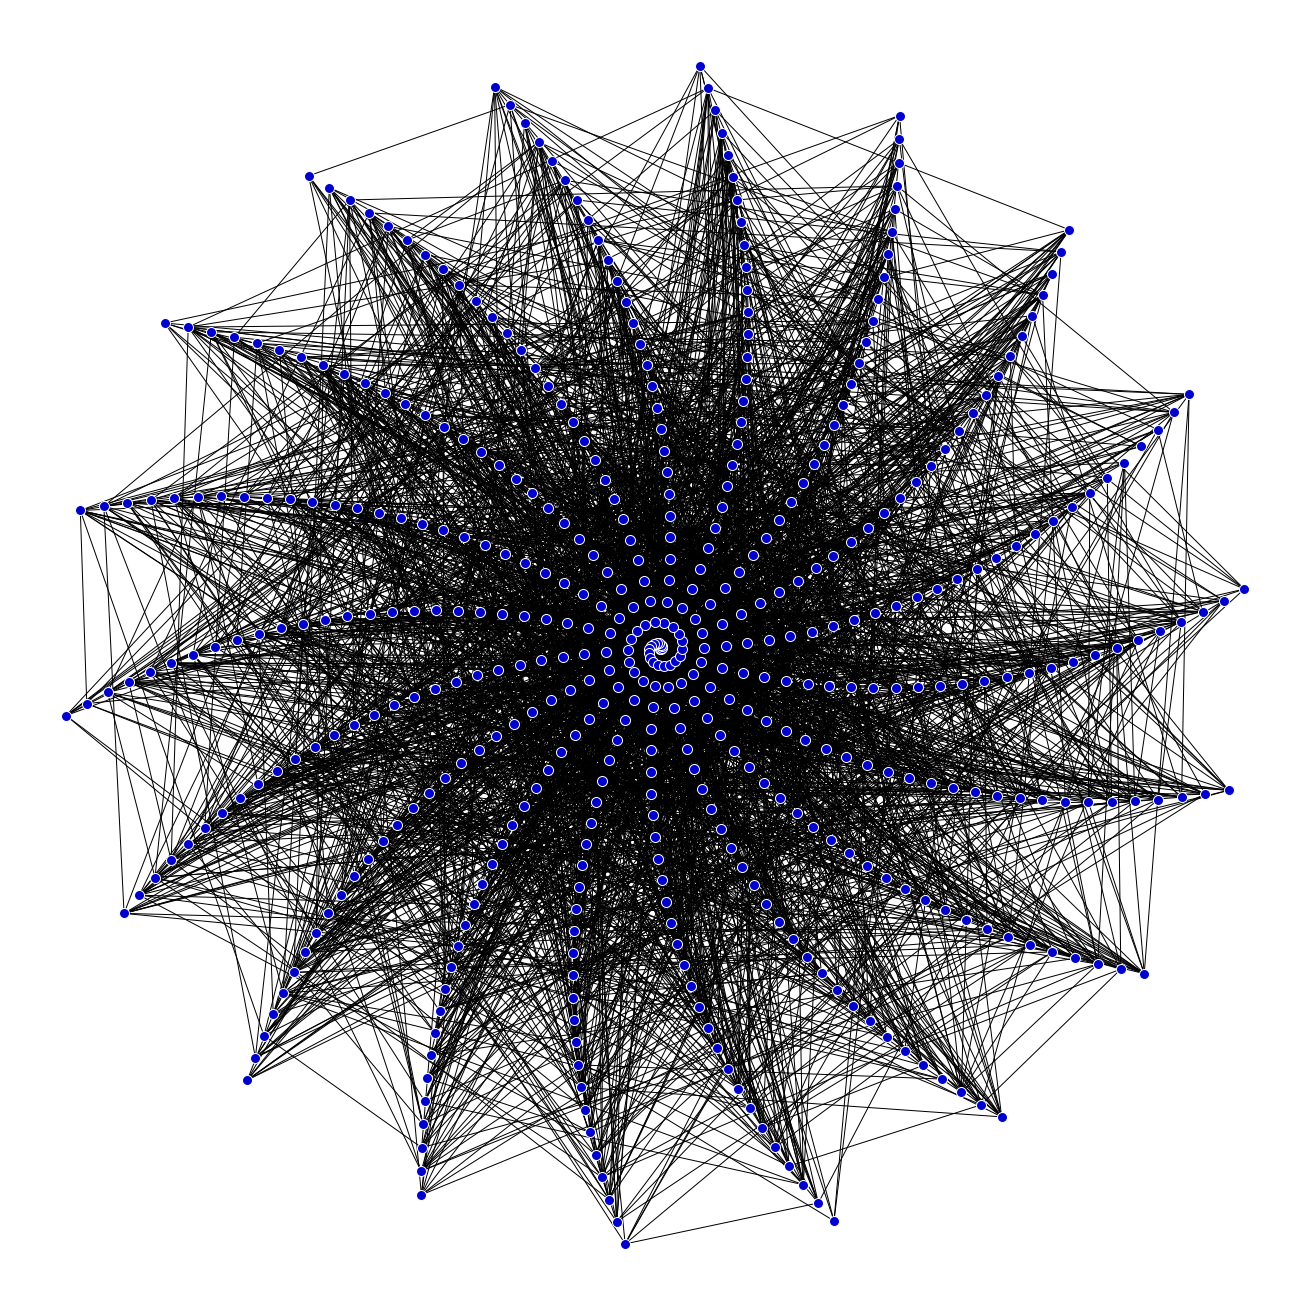

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    layout = nx.spiral_layout(gr)
    #layout = nx.spring_layout(gr)  
    plt.figure(3,figsize=(18,18)) 
    nx.draw(gr, node_size=100, pos=layout, cmap=plt.get_cmap('jet'), node_color = 'mediumblue', edgecolors='white')#, labels=mylabels, with_labels=True)
    plt.show()

show_graph_with_labels(adjacency_matrix)

This is the file where dataset generation is done.

In [8]:
import numpy as np
import pandas as pd
from copy import deepcopy
import random

Defining the structure of a node ( creating a class)

In [9]:
class Node:
    def __init__(s, name, location, ports_util, connections):
        
        #constants such as capacities of individual components 
        #100 gbps port cap
        #100 gbps for core, 40 gbps for edge
        s.port_capacity = 100    # 10 gigabits/sec, changing it to 100 Gbps
        # make it 8 ports
        s.card_capacity = 8 * s.port_capacity #6 ports, making it 8 ports
        s.node_capacity = 16 * s.card_capacity #16 cards
        # CISCO core router CPU and memory buffer size
        #s.cpu_buffer = 10, removing CPU buffer
        #keep only memory buffer
        s.mem_buffer = 1 #changed from 20, 20/10 = 2 is used to match with the scale of 10 of cpu_util
        
        
        #all risk factors converted to ceiling to get a round number and an integer value
        s.md = round(np.random.randint(0, 60),1) #manufacture discontinue
        
        #??????????????????????????????????????????????????????????????????????
        s.psf_rf = round((s.md/60) * 10) # psf is power supply failure
        
        s.ports_util = ports_util
        s.ports_rf = np.ceil(np.round(s.ports_util / 10)*0.9 + s.psf_rf*0.1) #rf is risk factor
        
        
        s.cards_util = np.sum(s.ports_util,axis=1)
        s.cards_rf = np.ceil(np.round((np.sum(s.ports_util,axis=1)/s.card_capacity) * 10)*0.9 + s.psf_rf*0.1)
        
        s.cpu_util = (np.sum(s.ports_util)/s.node_capacity) * 10 #- s.cpu_buffer, removing cpu buffer
        s.cpu_rf = np.ceil(round(s.cpu_util) * 0.9 + s.psf_rf*0.1)
        #print(s.cpu_rf)
        
        s.memory_util = s.cpu_util + s.mem_buffer #+ s.cpu_buffer # -20 corresponds to memory buffer, no cpu buffer 
        s.memory_rf = np.ceil(round(s.memory_util) * 0.9 + s.psf_rf*0.1)
        ## How are these variables used later??????
        s.location = location
        s.location_rf = np.random.randint(0,11)
        
        s.mis_config = np.random.randint(0,11)
        s.os_upgrade = np.random.randint(0,11)
        s.name = name
        
        #some nodes might not have any connections, for them the avg_link_rf is 0
        s.all_links = connections[name]
        if s.all_links:
            s.all_link_rf = (np.random.randint(0, 11, (1, len(s.all_links)))) * 0.9 + s.mis_config * 0.1
            s.avg_link_rf = np.ceil(np.mean(s.all_link_rf))
        else:
            s.avg_link_rf = 0

In [10]:
# port failuer candidates with probability greater than 5 in descending order

global rf_th 
rf_th = 5


def portfailure_candidates(nodes):
    port_fail_can_all = dict()
    for k in range(0,len(nodes)):
        ports_rf = nodes[k].ports_rf
        x,y = ports_rf.shape
        for i in range(0,x):
            for j in range(0,y):
                if(ports_rf[i,j] >= rf_th):
                    port_fail_can_all.update( { (k,i,j) : ports_rf[i,j] } )
    
    port_fail_can_all = dict(sorted(port_fail_can_all.items(), key=lambda x: x[1], reverse = True))
        
    return port_fail_can_all #return the pool of likly port failure candidates with rf greater than 5 in decreasing order


# card failuer candidates with probability greater than 5 in descending order
def cardfailure_candidates(nodes):
    card_fail_can_all = dict()
    for k in range(0,len(nodes)):
        cards_rf = nodes[k].cards_rf
        for i in range(0,len(cards_rf)):
            if(cards_rf[i] >= rf_th):
                card_fail_can_all.update( { (k,i) : cards_rf[i] } )
    card_fail_can_all = dict(sorted(card_fail_can_all.items(), key=lambda x: x[1], reverse = True))
    return card_fail_can_all #return the pool of likly card failure candidates with rf greater than 5 in decreasing order

# cpu failuer candidates with probability greater than 5 in descending order
def cpufailure_candidates(nodes):
    cpu_fail_can_all = dict()
    for k in range(0,len(nodes)):
        cpu_rf = nodes[k].cpu_rf
        if(cpu_rf >= rf_th):
            cpu_fail_can_all.update( { k : cpu_rf } )
    cpu_fail_can_all = sorted(cpu_fail_can_all.items(), key=lambda x: x[1], reverse = True)    
    cpu_fail_can_all = dict(cpu_fail_can_all)
    return cpu_fail_can_all #return the pool of likly cpu failure candidates with rf greater than 5 in decreasing order

# memory failuer candidates with probability greater than 5 in descending order
def memoryfailure_candidates(nodes):
    memory_fail_can_all = dict()
    for k in range(0,len(nodes)):
        memory_rf = nodes[k].memory_rf
        if(memory_rf >= rf_th):
            memory_fail_can_all.update( { k : memory_rf } )
    memory_fail_can_all = sorted(memory_fail_can_all.items(), key=lambda x: x[1], reverse = True)    
    memory_fail_can_all = dict(memory_fail_can_all)
    return memory_fail_can_all #return the pool of likly memory failure candidates with rf greater than 5 in decreasing order


#power supply failure candidates with probability greater than 5 in descending order
def power_supply_failure_candidates(nodes):
    power_fail_can_all = dict()
    for i in range(0, len(nodes)):
        if(nodes[i].psf_rf >= rf_th):
            power_fail_can_all.update({i : nodes[i].psf_rf})
    power_fail_can_all = sorted(power_fail_can_all.items(), key = lambda x : x[1], reverse = True)
    power_fail_can_all = dict(power_fail_can_all)
    return power_fail_can_all


#risky location failure candidates with probability greater than 5 in descending order
def location_failure_candidates(nodes):
    loc_fail_can_all = dict()
    for i in range(0, len(nodes)):
        if(nodes[i].location_rf >= rf_th):
            loc_fail_can_all.update({i : nodes[i].location_rf})
    loc_fail_can_all = sorted(loc_fail_can_all.items(), key = lambda x : x[1], reverse = True)
    loc_fail_can_all = dict(loc_fail_can_all)
    return loc_fail_can_all

#misconfiguration failure candidates with probability greater than 5 in descending order
def misconfig_failure_candidates(nodes):
    misconfig_fail_can_all = dict()
    for i in range(0, len(nodes)):
        if(nodes[i].mis_config >= rf_th):
            misconfig_fail_can_all.update({i : nodes[i].mis_config})
    misconfig_fail_can_all = sorted(misconfig_fail_can_all.items(), key = lambda x : x[1], reverse = True)
    misconfig_fail_can_all = dict(misconfig_fail_can_all)
    return misconfig_fail_can_all

#os upgrade failure candidates with probability greater than 5 in descending order
def os_failure_candidates(nodes):
    os_fail_can_all = dict()
    for i in range(0, len(nodes)):
        if(nodes[i].os_upgrade >= rf_th):
            os_fail_can_all.update({i : nodes[i].os_upgrade})
    os_fail_can_all = sorted(os_fail_can_all.items(), key = lambda x : x[1], reverse = True)
    os_fail_can_all = dict(os_fail_can_all)
    return os_fail_can_all

#link failure candidates with probability greater than 5 in descending order
def link_failure_candidates(nodes):
    link_fail_can_all = dict()
    for i in range(0, len(nodes)):
        if(nodes[i].avg_link_rf >= rf_th):
            link_fail_can_all.update({i : nodes[i].avg_link_rf})
    link_fail_can_all = sorted(link_fail_can_all.items(), key = lambda x : x[1], reverse = True)
    link_fail_can_all = dict(link_fail_can_all)
    return link_fail_can_all

Traffic generation fuction takes care of changing few parameters based on month or time of the day( rush hours/ rush quarter (6pm-12pm))  

In [11]:
#Traffic generation fuction takes care of changing few parameters based on month or time of the day
#( rush hours/ rush quarter (6pm-12pm))
def traffic_generation(o_nodes,nodes,rush_q,month_counter):
    
    for i in range(0,len(nodes)):
         
        #if one month passed, check if the manufacture discontinued is 60, if not add 1, don't let it cross 60    
        if (month_counter):
            if (nodes[i].md != 60):
                nodes[i].md = nodes[i].md + 1
            
        if (rush_q):
            ports_util_incr = nodes[i].ports_util
            for j in range(0,len(nodes[0].ports_util)):
                for k in range(0,len(nodes[0].ports_util[0])):
                    #4 changed to 40
                    ports_util_incr[j][k] = ports_util_incr[j][k] + np.random.randint(0,40) #port utilization is increased by a random factor
                    if (ports_util_incr[j][k] > 100) : ports_util_incr[j][k] = 100 #10 replaced with 100
            nodes[i].ports_util = ports_util_incr
            nodes[i].ports_rf = np.ceil(np.round(nodes[i].ports_util / 10)*0.9 + nodes[i].psf_rf*0.1) # instead of nodes[i].ports_util*0.9
            
            nodes[i].cards_util = np.sum(nodes[i].ports_util,axis=1)
            nodes[i].cards_rf = np.ceil(np.round(np.sum(nodes[i].ports_util,axis=1)/nodes[i].card_capacity * 10)*0.9 + nodes[i].psf_rf*0.1)
            
        
            nodes[i].cpu_util = (np.sum(nodes[i].ports_util)/nodes[i].node_capacity) * 10 #- nodes[i].cpu_buffer, removing this
            nodes[i].cpu_rf = np.ceil(round(nodes[i].cpu_util) * 0.9 + nodes[i].psf_rf*0.1)
        
            nodes[i].memory_util = nodes[i].cpu_util - nodes[i].mem_buffer  # -20 corresponds to memory buffer 
            nodes[i].memory_rf = np.ceil(round(nodes[i].memory_util) * 0.9 + nodes[i].psf_rf*0.1)
            
#             ###############
#             s.cards_util = np.sum(s.ports_util,axis=1)
#             s.cards_rf = np.round((np.sum(s.ports_util,axis=1)/s.card_capacity) * 10)*0.9 + s.psf_rf*0.1

#             s.cpu_util = (np.sum(s.ports_util)/s.node_capacity) * 10 #- s.cpu_buffer, removing cpu buffer
#             s.cpu_rf = round(s.cpu_util) * 0.9 + s.psf_rf*0.1
#             #print(s.cpu_rf)

#             s.memory_util = s.cpu_util - s.mem_buffer #+ s.cpu_buffer # -20 corresponds to memory buffer, no cpu buffer 
#             s.memory_rf = round(s.memory_util) * 0.9 + s.psf_rf*0.1
        else :
            nodes[i].ports_util = deepcopy(o_nodes[i].ports_util)
            nodes[i].ports_rf = np.ceil(np.round(nodes[i].ports_util / 10)*0.9 + nodes[i].psf_rf*0.1)
        
            nodes[i].cards_util = np.sum(nodes[i].ports_util,axis=1)
            nodes[i].cards_rf = np.ceil(np.round(np.sum(nodes[i].ports_util,axis=1)/nodes[i].card_capacity * 10)*0.9 + nodes[i].psf_rf*0.1)
        
            nodes[i].cpu_util = (np.sum(nodes[i].ports_util)/nodes[i].node_capacity) * 10 #- nodes[i].cpu_buffer, removing this
            nodes[i].cpu_rf = np.ceil(round(nodes[i].cpu_util) * 0.9 + nodes[i].psf_rf*0.1)
        
            nodes[i].memory_util = nodes[i].cpu_util - nodes[i].mem_buffer  # -20 corresponds to memory buffer 
            nodes[i].memory_rf = np.ceil(round(nodes[i].memory_util) * 0.9 + nodes[i].psf_rf*0.1)
        
        
        
        
    return nodes

Data creation function creates the dataset

In [12]:
from datetime import datetime, timedelta
#year, month, date, hour, minutes, seconds
global date_time
global delta
date_time = datetime(2023, 1, 1, 6, 0, 0)
delta = timedelta(hours = 6)

In [13]:
def data_creation(nodes,equipment_count, date): #adding the date parameter
    global final_data
    #global final_dataframe_size
    
    # 10% of total equipments.. what is the random offset doing? - 1-2% of the total equipments can fail at a time
    # -------KEEPING IT TO 1% FOR NOW
    failure_count = round(equipment_count * 0.01)# np.random.randint(1,3) * 0.01)
    portfailure_count = round(failure_count * 0.1)
    cardfailure_count = round(failure_count * 0.1)
    cpufailure_count = round(failure_count * 0.01)
    memoryfailure_count = round(failure_count * 0.01)
    powerfailure_count = round(failure_count * 0.01)
    locationfailure_count = round(failure_count * 0.09)
    osfailure_count = round(failure_count * 0.18)
    configfailure_count = round(failure_count * 0.18)
    linkfailure_count = round(failure_count * 0.32)
    
   # final_dataframe_size = portfailure_count + cardfailure_count + 
    #memoryfailure_count + cpufailure_count + powerfailure_count + locationfailure_count + 
    #osfailure_count + configfailure_count
    
    various_failure_nodes = []

    #CPU failure data
    cpu_fail_can_all = cpufailure_candidates(nodes)
    trgt = 1
    for i in list(cpu_fail_can_all)[0:cpufailure_count]:
        if i not in various_failure_nodes:
            appendingToData(nodes, i, trgt, date)
            various_failure_nodes.append(i)  

    #Memory failure data
    memory_fail_can_all = memoryfailure_candidates(nodes)
    trgt = 2
    for i in list(memory_fail_can_all)[0:memoryfailure_count]:
        if i not in various_failure_nodes:
            appendingToData(nodes, i, trgt, date)
            various_failure_nodes.append(i)
            
            #Power supply failure data
    power_fail_can_all = power_supply_failure_candidates(nodes)
    trgt = 5
    temp = list(power_fail_can_all)[0:powerfailure_count]
    #random.shuffle(temp)
    for key in temp:
        if key not in various_failure_nodes:
            i = key
            appendingToData(nodes, i, trgt, date)
            various_failure_nodes.append(i) 
   

    #Port failure data
    port_fail_can_all = portfailure_candidates(nodes)
    trgt = 4
    temp = list(port_fail_can_all)[0:portfailure_count]
    #random.shuffle(temp)
    for key in temp:
        i,_,_ = key
        if i not in various_failure_nodes:
            appendingToData(nodes, i, trgt, date)
            various_failure_nodes.append(i)
            
        
    #Card failure data
    card_fail_can_all = cardfailure_candidates(nodes)
    trgt = 3
    temp = list(card_fail_can_all)[0:cardfailure_count]
    #random.shuffle(temp)
    for key in temp:
        i,_ = key
        if i not in various_failure_nodes:
            appendingToData(nodes, i, trgt, date)
            various_failure_nodes.append(i)
            
            
                   
        #location failure data
    location_fail_can_all = location_failure_candidates(nodes)
    trgt = 6
    temp = list(location_fail_can_all)[0:locationfailure_count]
    #random.shuffle(temp)
    for key in temp:
        if key not in various_failure_nodes:
            i = key
            appendingToData(nodes, i, trgt, date)
            various_failure_nodes.append(i)
            
    #OS failure data
    os_fail_can_all = os_failure_candidates(nodes)
    trgt = 7
    temp = list(os_fail_can_all)[0:osfailure_count]
    #random.shuffle(temp)
    for key in temp:
        if key not in various_failure_nodes:
            i = key
            appendingToData(nodes, i, trgt, date)
            various_failure_nodes.append(i)
        
    #mis config failure data
    misconfig_fail_can_all = misconfig_failure_candidates(nodes)
    trgt = 8
    temp = list(misconfig_fail_can_all)[0:configfailure_count]
    #random.shuffle(temp)
    for key in temp:
        if key not in various_failure_nodes:
            i = key
            appendingToData(nodes, i, trgt, date)
            various_failure_nodes.append(i)
    
    #linl failure data
    link_fail_can_all = link_failure_candidates(nodes)
    trgt = 9
    temp = list(link_fail_can_all)[0:linkfailure_count]
    #random.shuffle(temp)
    for key in temp:
        if key not in various_failure_nodes:
            i = key
            appendingToData(nodes, i, trgt, date)
            various_failure_nodes.append(i)
    
    various_failure_nodes = np.array(various_failure_nodes)      
    various_failure_nodes = list(np.unique(various_failure_nodes))
    
    #No failure candidates
    trgt = 0
    for n in range(len(nodes)):
        if n not in various_failure_nodes:
            appendingToData(nodes, n, trgt, date)

In [14]:
global final_data
final_data = []
def appendingToData(nodes, i, trgt, date):
#     global date_time #commenting out these two date lines, using the passed parameter instead
#     global delta
    temp = [date, nodes[i].name, nodes[i].md, nodes[i].psf_rf, int(nodes[i].cpu_rf), int(nodes[i].memory_rf), nodes[i].location_rf, nodes[i].mis_config, nodes[i].os_upgrade, int(nodes[i].avg_link_rf)]
    for j in range(0, 16):
        #print(str(int(j)) + ":  " + str(nodes[i].cards_rf[j]))
        cardRf = int(nodes[i].cards_rf[j])
        temp.append(cardRf)

    for j in range(0, 16):
        for k in range(0, 8):#changed from 6 to 8
            #print(str(int(j)) + " , " + str(int(k)) + ":  " + str(nodes[i].ports_rf[j][k]))
            portRf = int(nodes[i].ports_rf[j][k])
            temp.append(portRf)
    temp.append(trgt)
    final_data.append(temp)
#    date_time = date_time + delta
    return temp

In [15]:
column_names = ['date', 'name', 'manufacture_discontinue', 'power_supply_rf', 'cpu_rf', 'memory_rf', 'location_rf', 'mis_config_rf', 'os_upgrade_rf', 'avg_link_rf']
for j in range(0, 16):
        #print(str(int(j)) + ":  " + str(nodes[i].cards_rf[j]))
        column_names.append('card' + str(j) + '_rf')

for j in range(0, 16):
    for k in range(0, 8):#changed from 6 to 8
        #print(str(int(j)) + " , " + str(int(k)) + ":  " + str(nodes[i].ports_rf[j][k]))
        column_names.append('card' + str(j) + '_port' + str(k) + '_rf')

column_names.append('target')

In [16]:
len(column_names)

155

Our fuctions end here

From here nodes are initialized and three year simulation process is done

In [17]:
#initializing the nodes
# Total No. of ports = 100 (nodes) * 16 (cards per node) * 6 (ports per card)
# Total no. Of cards = 100 * 16
# Total no. Of cpu(s) = 100( one per node)
# Total no. Of memory units = 100
# Total no. Of power supply units = 100
# I believe the remaining 390 are hardware links between 100 nodes( links were also considered as part of network equipment).  
equipment_count = (number_of_nodes * 16 * 8) + (number_of_nodes * 16) + 3 * (number_of_nodes) + total_link_count #12146
#no_of_nodes = 100, removing this
print(equipment_count)
nodes = []

for i in range(0,number_of_nodes):
#     changing to uniform distribution
    ports = np.random.randint(1,101,(16,8)) #creates a 16 * 6 matrix for #changed from 6 to 8 #changing from 11 to 101
    x = Node(i, i, ports, list_of_all_links)
    nodes.append(x)  

76688


In [18]:
o_nodes = deepcopy(nodes)

# Time for 100 nodes: 89.9566s, 87.99718299999999, 88.71435
# Time for 200 nodes: 180.3846s, 176.314232, 180.4672
# Time for 500 nodes: 471.1452s, 471.16554s

In [19]:
# One year simulation process, each day is divided into 4 quarters
global date_time
global delta
import time
start = time.process_time()
# your code here    

for i in range(1,4381): #1461 = 1 year, 365 * 4 = 1460, because each day is divided into 4 quarters
#     replacing 1461 with 4381, creating data for 3 years
    
    if (i % 4 == 3):
        rush_q = 1 #3rd quarter is rush quarter, 12pm to 6pm
    else :
        rush_q = 0#the other 3 quarters are non-rush

    if (i%112 == 0):# 112 quarter in a month, 28 days a month, 4 weeks
        month_counter = 1
    else :
        month_counter = 0
        
    
    nodes = traffic_generation(o_nodes, nodes, rush_q, month_counter)
    
    #print(str(i) + " " + str(i % 4 == 3))
    
    if (i % 4 == 3):
        data_creation(nodes, equipment_count, date_time)
    date_time = date_time + delta
    

print(time.process_time() - start)

470.18264500000004


In [20]:
print(memoryfailure_candidates(nodes))

{38: 6.0, 173: 6.0, 196: 6.0, 299: 6.0, 347: 6.0, 492: 6.0, 0: 5.0, 1: 5.0, 3: 5.0, 4: 5.0, 5: 5.0, 13: 5.0, 16: 5.0, 17: 5.0, 19: 5.0, 20: 5.0, 23: 5.0, 24: 5.0, 25: 5.0, 28: 5.0, 29: 5.0, 30: 5.0, 37: 5.0, 41: 5.0, 42: 5.0, 43: 5.0, 44: 5.0, 45: 5.0, 49: 5.0, 51: 5.0, 52: 5.0, 56: 5.0, 57: 5.0, 58: 5.0, 60: 5.0, 64: 5.0, 66: 5.0, 67: 5.0, 68: 5.0, 69: 5.0, 71: 5.0, 75: 5.0, 76: 5.0, 77: 5.0, 82: 5.0, 84: 5.0, 86: 5.0, 87: 5.0, 89: 5.0, 91: 5.0, 92: 5.0, 93: 5.0, 95: 5.0, 97: 5.0, 98: 5.0, 99: 5.0, 100: 5.0, 101: 5.0, 102: 5.0, 105: 5.0, 112: 5.0, 114: 5.0, 116: 5.0, 117: 5.0, 119: 5.0, 123: 5.0, 124: 5.0, 126: 5.0, 128: 5.0, 130: 5.0, 131: 5.0, 132: 5.0, 134: 5.0, 135: 5.0, 136: 5.0, 137: 5.0, 138: 5.0, 141: 5.0, 143: 5.0, 144: 5.0, 148: 5.0, 154: 5.0, 155: 5.0, 156: 5.0, 158: 5.0, 160: 5.0, 161: 5.0, 162: 5.0, 163: 5.0, 166: 5.0, 169: 5.0, 170: 5.0, 174: 5.0, 175: 5.0, 179: 5.0, 182: 5.0, 183: 5.0, 184: 5.0, 186: 5.0, 187: 5.0, 193: 5.0, 194: 5.0, 197: 5.0, 198: 5.0, 200: 5.0, 201: 

In [21]:
df = pd.DataFrame(final_data, columns = column_names)

In [22]:
df['target'].value_counts()

0    120249
7    116547
9    110349
8     81718
6     63196
3     32374
1      8760
5      8494
4      3033
2      2780
Name: target, dtype: int64

In [23]:
#final_data.drop(['memory_util', 'cpu_util', 'card0_util', 'card1_util', 'card2_util', 'card3_util', 'card4_util', 'card5_util', 'card6_util', 'card7_util', 'card8_util', 'card9_util', 'card10_util', 'card11_util', 'card12_util', 'card13_util', 'card14_util', 'card15_util'], axis=1, inplace=True)

In [24]:
import calendar
import time

current_GMT = time.gmtime()

time_stamp = calendar.timegm(current_GMT)

filename = 'Failure_gt6_' + str(time_stamp) + '.csv'


In [25]:
filename

'Failure_gt6_1679846028.csv'

# Save file to csv with time info

In [26]:
#df.to_csv(filename, index=False) 


In [27]:
portfailure_candidates(nodes)

{(0, 1, 1): 10.0,
 (0, 3, 6): 10.0,
 (0, 6, 1): 10.0,
 (0, 9, 3): 10.0,
 (0, 11, 2): 10.0,
 (0, 11, 3): 10.0,
 (0, 12, 6): 10.0,
 (0, 13, 2): 10.0,
 (0, 14, 1): 10.0,
 (0, 15, 0): 10.0,
 (1, 1, 1): 10.0,
 (1, 1, 3): 10.0,
 (1, 2, 1): 10.0,
 (1, 5, 0): 10.0,
 (1, 6, 1): 10.0,
 (1, 7, 6): 10.0,
 (1, 10, 7): 10.0,
 (2, 1, 6): 10.0,
 (2, 3, 2): 10.0,
 (2, 10, 0): 10.0,
 (2, 10, 6): 10.0,
 (2, 11, 4): 10.0,
 (2, 14, 0): 10.0,
 (2, 15, 2): 10.0,
 (3, 2, 3): 10.0,
 (3, 4, 0): 10.0,
 (3, 4, 1): 10.0,
 (3, 10, 7): 10.0,
 (3, 13, 5): 10.0,
 (4, 0, 2): 10.0,
 (4, 4, 1): 10.0,
 (4, 7, 2): 10.0,
 (4, 8, 5): 10.0,
 (4, 9, 7): 10.0,
 (4, 10, 1): 10.0,
 (4, 10, 2): 10.0,
 (4, 10, 5): 10.0,
 (4, 10, 7): 10.0,
 (4, 11, 0): 10.0,
 (5, 6, 4): 10.0,
 (5, 7, 2): 10.0,
 (5, 11, 0): 10.0,
 (5, 14, 6): 10.0,
 (5, 15, 6): 10.0,
 (7, 1, 5): 10.0,
 (7, 6, 3): 10.0,
 (7, 6, 4): 10.0,
 (7, 7, 3): 10.0,
 (7, 7, 6): 10.0,
 (7, 8, 5): 10.0,
 (7, 8, 7): 10.0,
 (7, 9, 0): 10.0,
 (7, 9, 7): 10.0,
 (7, 10, 1): 10.0,
 (7, 

In [28]:
cpufailure_candidates(nodes)

{38: 7.0,
 299: 7.0,
 347: 7.0,
 492: 7.0,
 0: 6.0,
 1: 6.0,
 3: 6.0,
 4: 6.0,
 13: 6.0,
 16: 6.0,
 17: 6.0,
 19: 6.0,
 20: 6.0,
 23: 6.0,
 25: 6.0,
 28: 6.0,
 29: 6.0,
 30: 6.0,
 37: 6.0,
 41: 6.0,
 42: 6.0,
 43: 6.0,
 44: 6.0,
 45: 6.0,
 49: 6.0,
 51: 6.0,
 52: 6.0,
 56: 6.0,
 57: 6.0,
 58: 6.0,
 60: 6.0,
 64: 6.0,
 66: 6.0,
 67: 6.0,
 68: 6.0,
 69: 6.0,
 71: 6.0,
 75: 6.0,
 76: 6.0,
 77: 6.0,
 84: 6.0,
 86: 6.0,
 87: 6.0,
 89: 6.0,
 91: 6.0,
 92: 6.0,
 93: 6.0,
 95: 6.0,
 97: 6.0,
 98: 6.0,
 99: 6.0,
 105: 6.0,
 112: 6.0,
 114: 6.0,
 116: 6.0,
 117: 6.0,
 123: 6.0,
 126: 6.0,
 128: 6.0,
 130: 6.0,
 131: 6.0,
 132: 6.0,
 134: 6.0,
 135: 6.0,
 136: 6.0,
 137: 6.0,
 138: 6.0,
 141: 6.0,
 143: 6.0,
 144: 6.0,
 148: 6.0,
 154: 6.0,
 155: 6.0,
 156: 6.0,
 158: 6.0,
 160: 6.0,
 161: 6.0,
 162: 6.0,
 163: 6.0,
 166: 6.0,
 169: 6.0,
 173: 6.0,
 174: 6.0,
 179: 6.0,
 182: 6.0,
 183: 6.0,
 186: 6.0,
 187: 6.0,
 193: 6.0,
 194: 6.0,
 196: 6.0,
 197: 6.0,
 198: 6.0,
 200: 6.0,
 201: 6.0,
 203: 6

In [29]:
cardfailure_candidates(nodes)

{(64, 2): 9.0,
 (98, 4): 9.0,
 (137, 7): 9.0,
 (189, 13): 9.0,
 (250, 10): 9.0,
 (270, 11): 9.0,
 (299, 15): 9.0,
 (434, 13): 9.0,
 (437, 13): 9.0,
 (13, 9): 8.0,
 (13, 11): 8.0,
 (17, 2): 8.0,
 (20, 13): 8.0,
 (28, 6): 8.0,
 (28, 13): 8.0,
 (37, 3): 8.0,
 (37, 6): 8.0,
 (38, 1): 8.0,
 (38, 4): 8.0,
 (38, 13): 8.0,
 (38, 14): 8.0,
 (42, 0): 8.0,
 (44, 8): 8.0,
 (44, 10): 8.0,
 (45, 6): 8.0,
 (45, 10): 8.0,
 (47, 7): 8.0,
 (52, 0): 8.0,
 (56, 3): 8.0,
 (56, 15): 8.0,
 (58, 4): 8.0,
 (58, 11): 8.0,
 (60, 9): 8.0,
 (64, 4): 8.0,
 (66, 2): 8.0,
 (67, 12): 8.0,
 (75, 12): 8.0,
 (77, 7): 8.0,
 (77, 10): 8.0,
 (77, 15): 8.0,
 (84, 7): 8.0,
 (84, 11): 8.0,
 (93, 5): 8.0,
 (95, 1): 8.0,
 (100, 11): 8.0,
 (104, 3): 8.0,
 (111, 4): 8.0,
 (112, 14): 8.0,
 (114, 1): 8.0,
 (114, 11): 8.0,
 (116, 0): 8.0,
 (116, 4): 8.0,
 (123, 7): 8.0,
 (123, 15): 8.0,
 (126, 5): 8.0,
 (126, 11): 8.0,
 (129, 14): 8.0,
 (130, 0): 8.0,
 (132, 3): 8.0,
 (134, 0): 8.0,
 (137, 3): 8.0,
 (143, 13): 8.0,
 (154, 4): 8.0,
 (

In [30]:
df.describe()

,name,manufacture_discontinue,power_supply_rf,cpu_rf,memory_rf,location_rf,mis_config_rf,os_upgrade_rf,avg_link_rf,card0_rf,...,card14_port7_rf,card15_port0_rf,card15_port1_rf,card15_port2_rf,card15_port3_rf,card15_port4_rf,card15_port5_rf,card15_port6_rf,card15_port7_rf,target
count,547500.00000,547500.000000,547500.000000,547500.000000,547500.000000,547500.000000,547500.000000,547500.000000,547500.000000,547500.000000,...,547500.000000,547500.000000,547500.000000,547500.000000,547500.000000,547500.000000,547500.000000,547500.000000,547500.00000,547500.000000
mean,249.50000,44.821956,4.990000,7.149850,6.232283,4.970000,5.014000,4.934000,5.570000,7.027266,...,6.871136,7.105063,6.851070,6.842780,7.150022,7.044568,7.218720,7.046075,6.93183,5.493943
std,144.33741,15.822134,2.982267,0.569465,0.589470,3.129396,3.200285,3.136505,1.200459,1.012788,...,2.544754,2.523255,2.512508,2.529299,2.523433,2.529179,2.446397,2.552860,2.46143,3.365361
min,0.00000,0.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,2.000000,3.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
25%,124.75000,33.000000,2.000000,7.000000,6.000000,2.000000,2.000000,2.000000,5.000000,6.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,3.000000
50%,249.50000,49.000000,5.000000,7.000000,6.000000,5.000000,5.000000,5.000000,6.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,8.000000,7.000000,7.00000,7.000000
75%,374.25000,60.000000,8.000000,7.000000,7.000000,8.000000,8.000000,8.000000,6.000000,8.000000,...,9.000000,10.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,9.00000,8.000000
max,499.00000,60.000000,10.000000,9.000000,8.000000,10.000000,10.000000,10.000000,9.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,9.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547500 entries, 0 to 547499
Columns: 155 entries, date to target
dtypes: datetime64[ns](1), int64(154)
memory usage: 647.4 MB


In [34]:
#df.to_csv("100_nodes.csv", index=False)
df.to_csv("500_nodes.csv", index=False)

In [33]:
power_supply_failure_candidates(nodes)

{25: 10,
 52: 10,
 56: 10,
 60: 10,
 64: 10,
 71: 10,
 77: 10,
 116: 10,
 128: 10,
 143: 10,
 154: 10,
 163: 10,
 211: 10,
 230: 10,
 253: 10,
 270: 10,
 282: 10,
 287: 10,
 289: 10,
 387: 10,
 411: 10,
 429: 10,
 437: 10,
 450: 10,
 452: 10,
 462: 10,
 475: 10,
 483: 10,
 497: 10,
 13: 9,
 20: 9,
 45: 9,
 57: 9,
 66: 9,
 98: 9,
 114: 9,
 126: 9,
 130: 9,
 137: 9,
 144: 9,
 194: 9,
 198: 9,
 200: 9,
 218: 9,
 222: 9,
 228: 9,
 250: 9,
 258: 9,
 271: 9,
 324: 9,
 353: 9,
 363: 9,
 366: 9,
 382: 9,
 409: 9,
 434: 9,
 453: 9,
 457: 9,
 477: 9,
 486: 9,
 492: 9,
 28: 8,
 30: 8,
 37: 8,
 38: 8,
 42: 8,
 43: 8,
 44: 8,
 67: 8,
 68: 8,
 75: 8,
 84: 8,
 93: 8,
 95: 8,
 105: 8,
 112: 8,
 123: 8,
 132: 8,
 134: 8,
 155: 8,
 156: 8,
 158: 8,
 161: 8,
 166: 8,
 169: 8,
 179: 8,
 182: 8,
 183: 8,
 201: 8,
 203: 8,
 215: 8,
 220: 8,
 225: 8,
 226: 8,
 232: 8,
 234: 8,
 237: 8,
 254: 8,
 257: 8,
 259: 8,
 264: 8,
 272: 8,
 280: 8,
 281: 8,
 288: 8,
 302: 8,
 306: 8,
 312: 8,
 313: 8,
 316: 8,
 332: 8